In [4]:
import numpy as np
import os,sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns; sns.set()  # for plot styling
%matplotlib notebook

root_path = '/rhome/wzhan097/shared/Deform-Linkers/'
data_path = os.path.join(root_path,'data')
hessian_file = os.path.join(data_path,'hessian.npy')

In [2]:
root_path = '/rhome/wzhan097/shared/Deform-Linkers/'
data_path = os.path.join(root_path,'data')
hessian_file = os.path.join(data_path,'hessian.npy')
x = np.load(hessian_file)

<IPython.core.display.Javascript object>


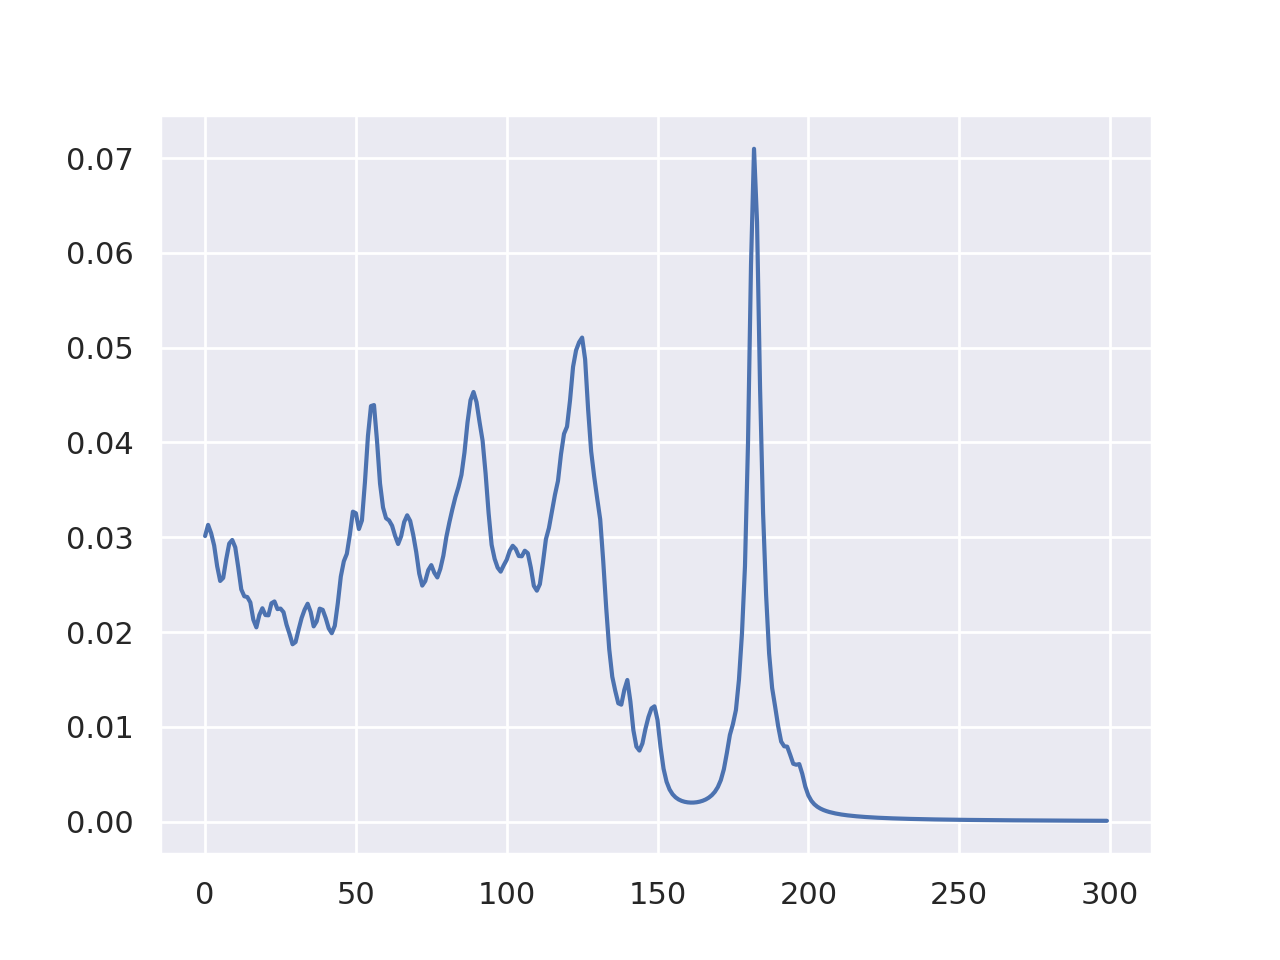

<IPython.core.display.Javascript object>


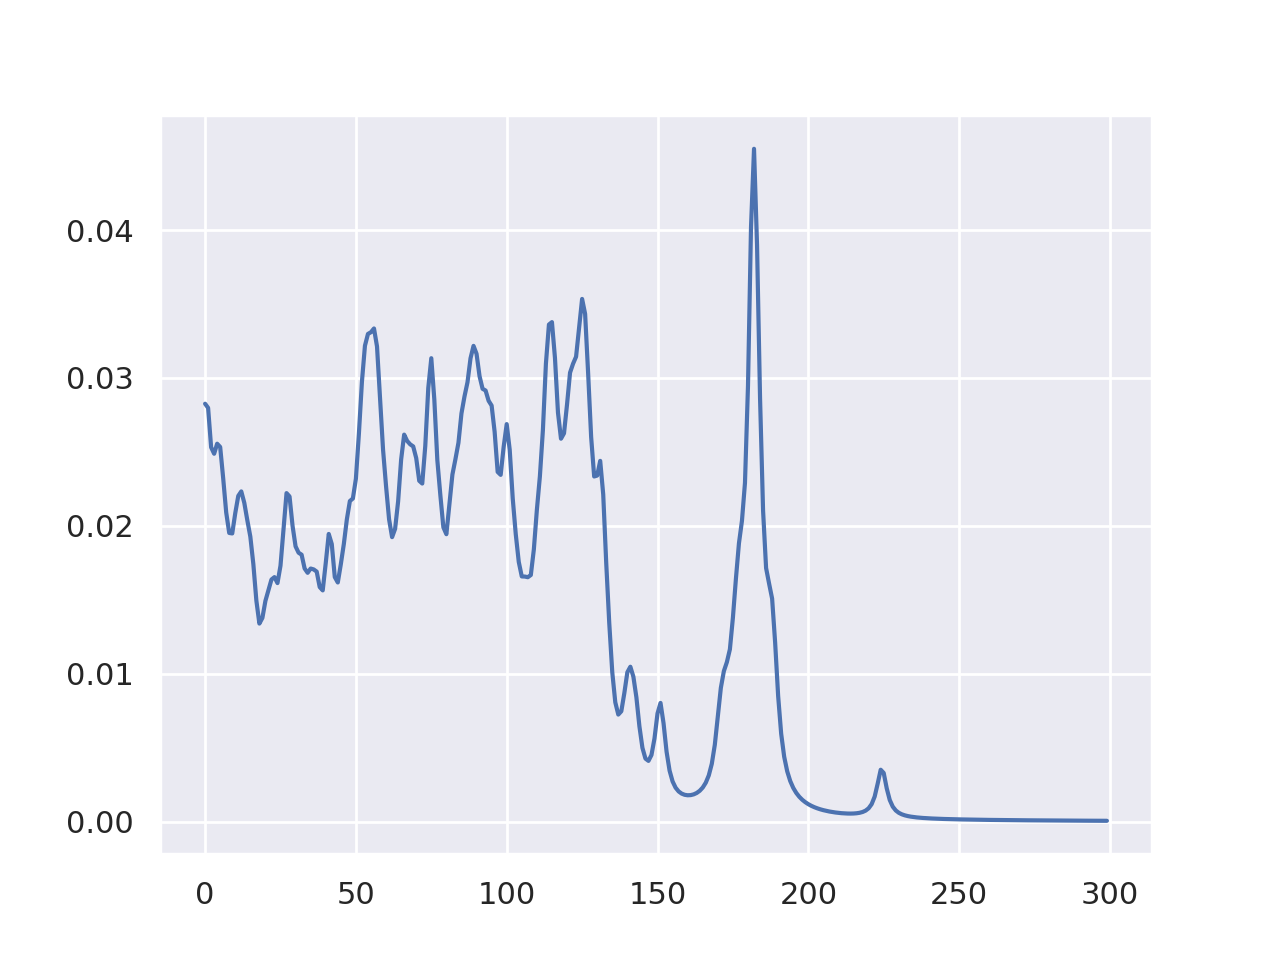

<IPython.core.display.Javascript object>


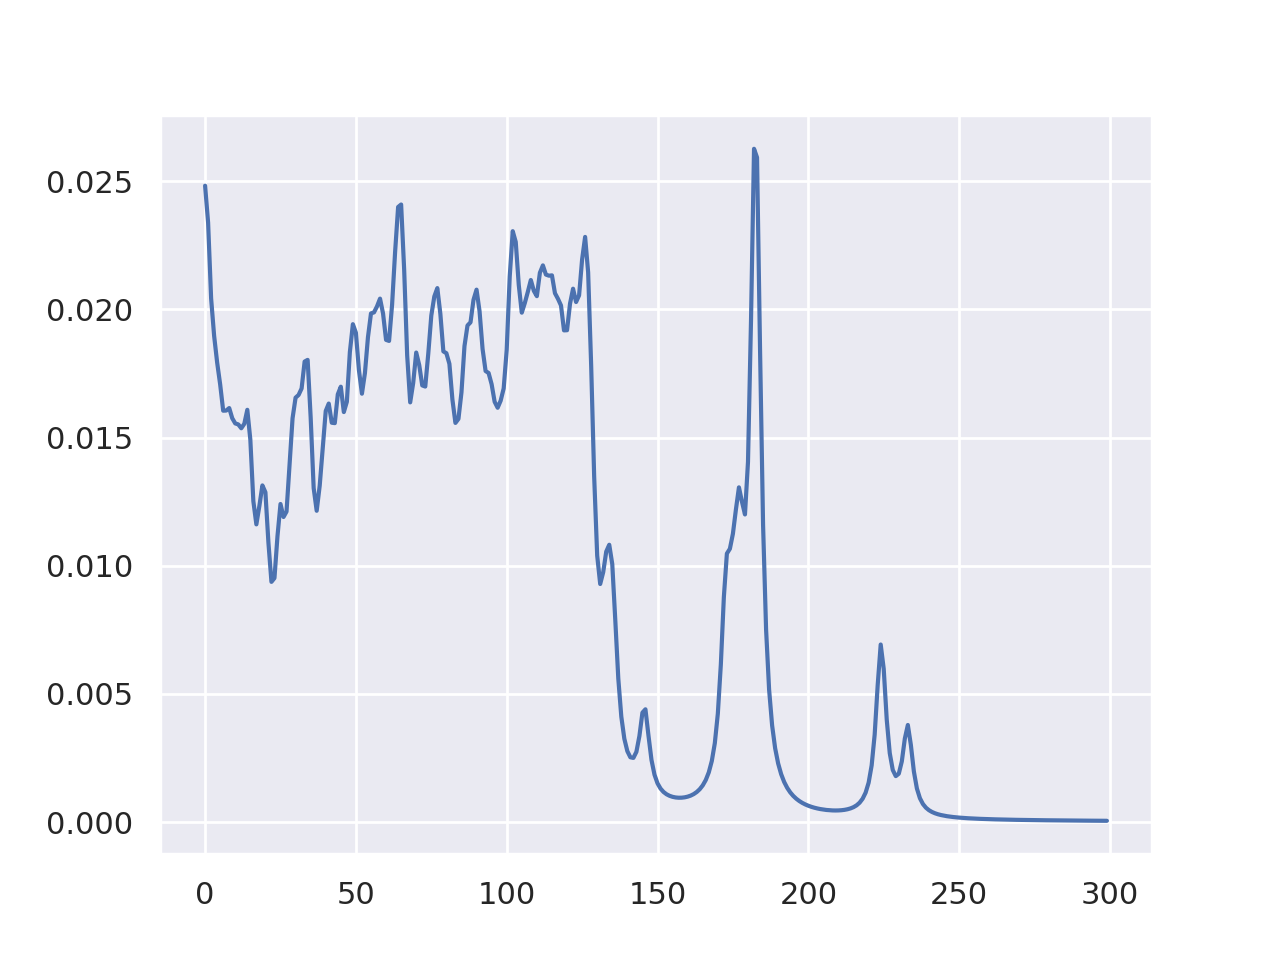

In [5]:
##original data
for e in x[:3]:
    plt.figure()
    plt.plot(e)
    plt.show()

In [6]:
k = 10 ###num of components

In [7]:
####PCA(sklearn)
from sklearn.decomposition import PCA
pca = PCA(n_components=k)
principalComponents = pca.fit_transform(x)
print(principalComponents.shape)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)


(16000, 10)
[0.6310678  0.16751537 0.01998048 0.01545126 0.01220592 0.01145255
 0.00979824 0.00838535 0.00723121 0.00619213]
[7.42584299 3.82591292 1.32132828 1.1619562  1.03274464 1.00036566
 0.92529839 0.85598941 0.79490149 0.73557617]


<IPython.core.display.Javascript object>


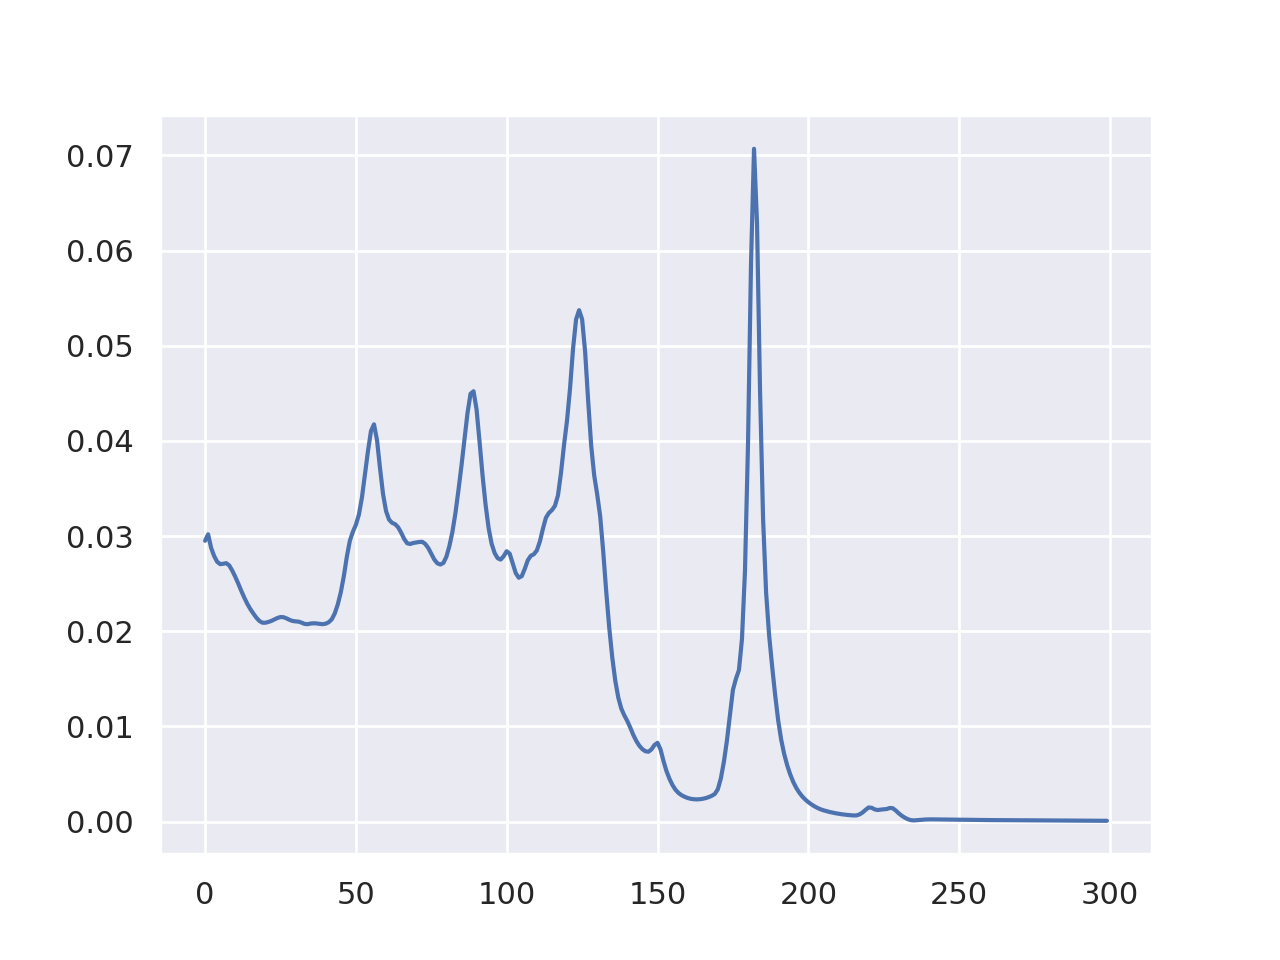

<IPython.core.display.Javascript object>


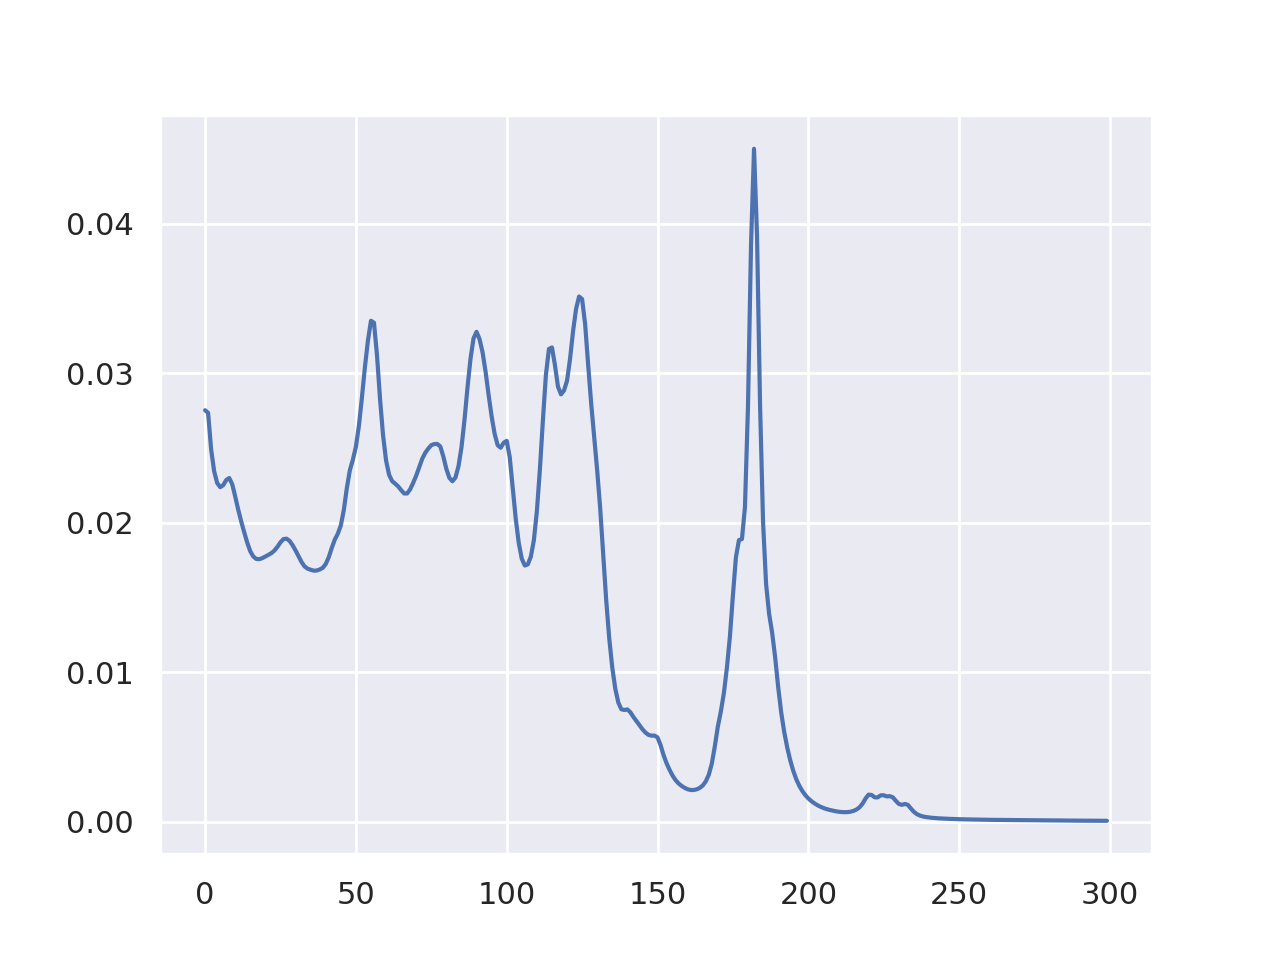

<IPython.core.display.Javascript object>


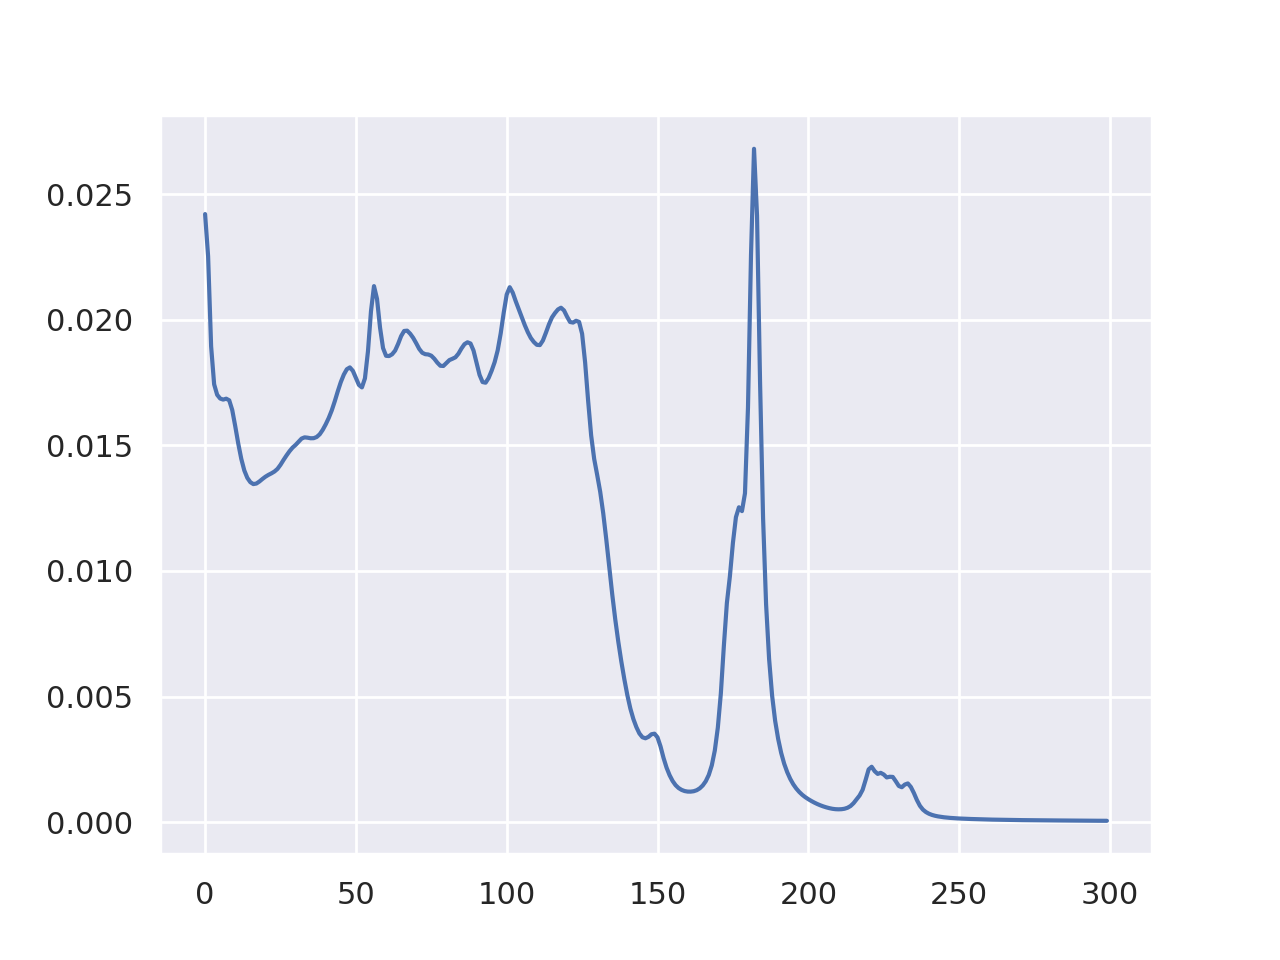

In [8]:
# reverse(w/ normlization)
x_reverse = pca.inverse_transform(principalComponents)
for e in x_reverse[:3]:
#for e in x_approx[:3]:
    plt.figure()
    plt.plot(e)
    plt.show()

<IPython.core.display.Javascript object>


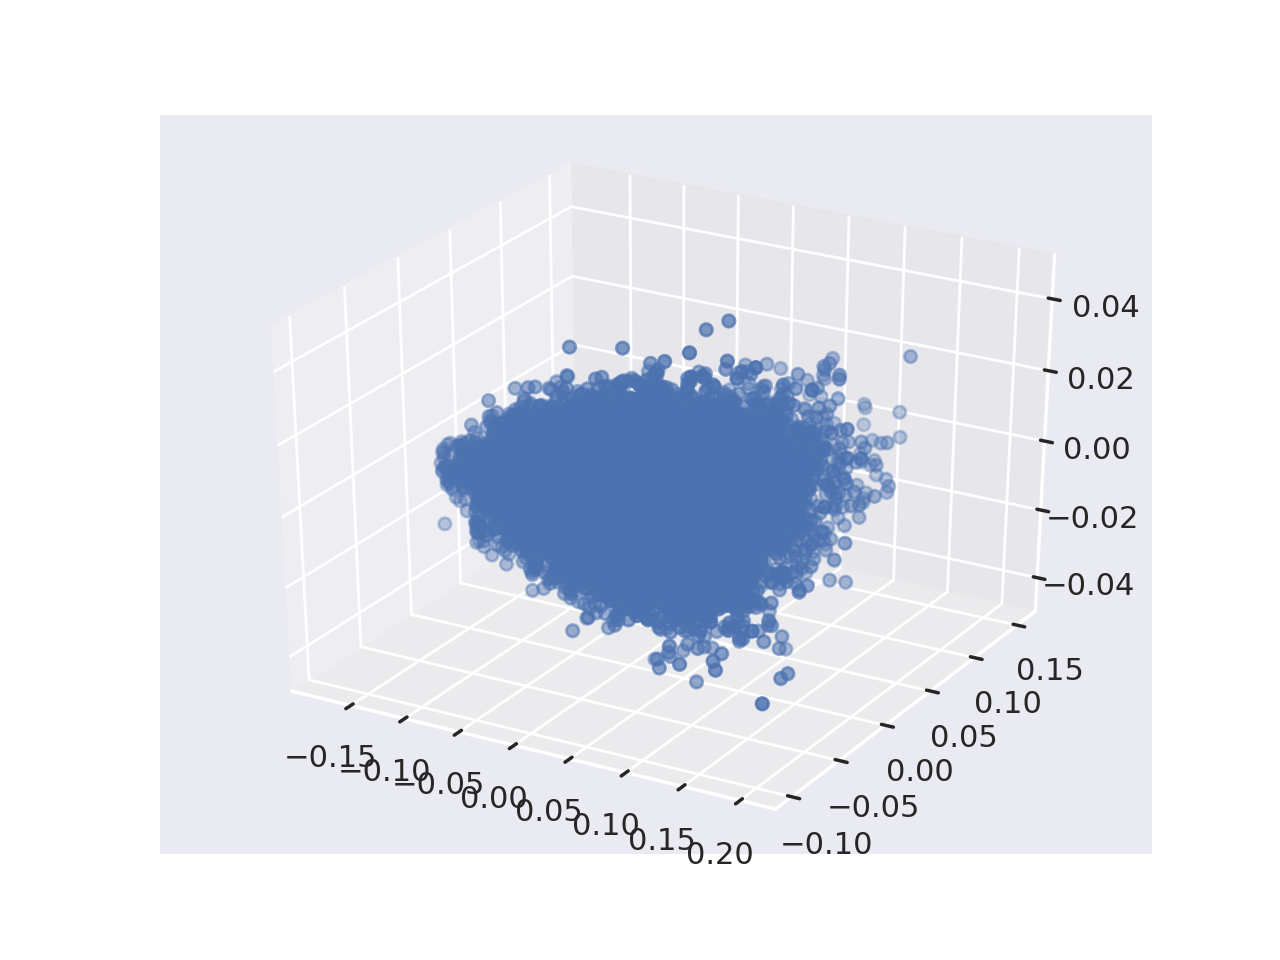

In [9]:
###after PCA(sklearn)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=principalComponents[:,0],ys=principalComponents[:,1],zs=principalComponents[:,2])

In [10]:
m, n = x.shape

mean = np.mean(x, axis=0)
norm = x - mean
scope = np.max(norm, axis=0) - np.min(norm, axis=0)
X = norm / scope

Sigma = (1.0 / m) * np.dot(X.T, X)

U, S, V = np.linalg.svd(Sigma)

U_reduce = U[:, 0:k].reshape(n, k)

Z = np.dot(X, U_reduce)
print(Z.shape)

(16000, 10)


<IPython.core.display.Javascript object>


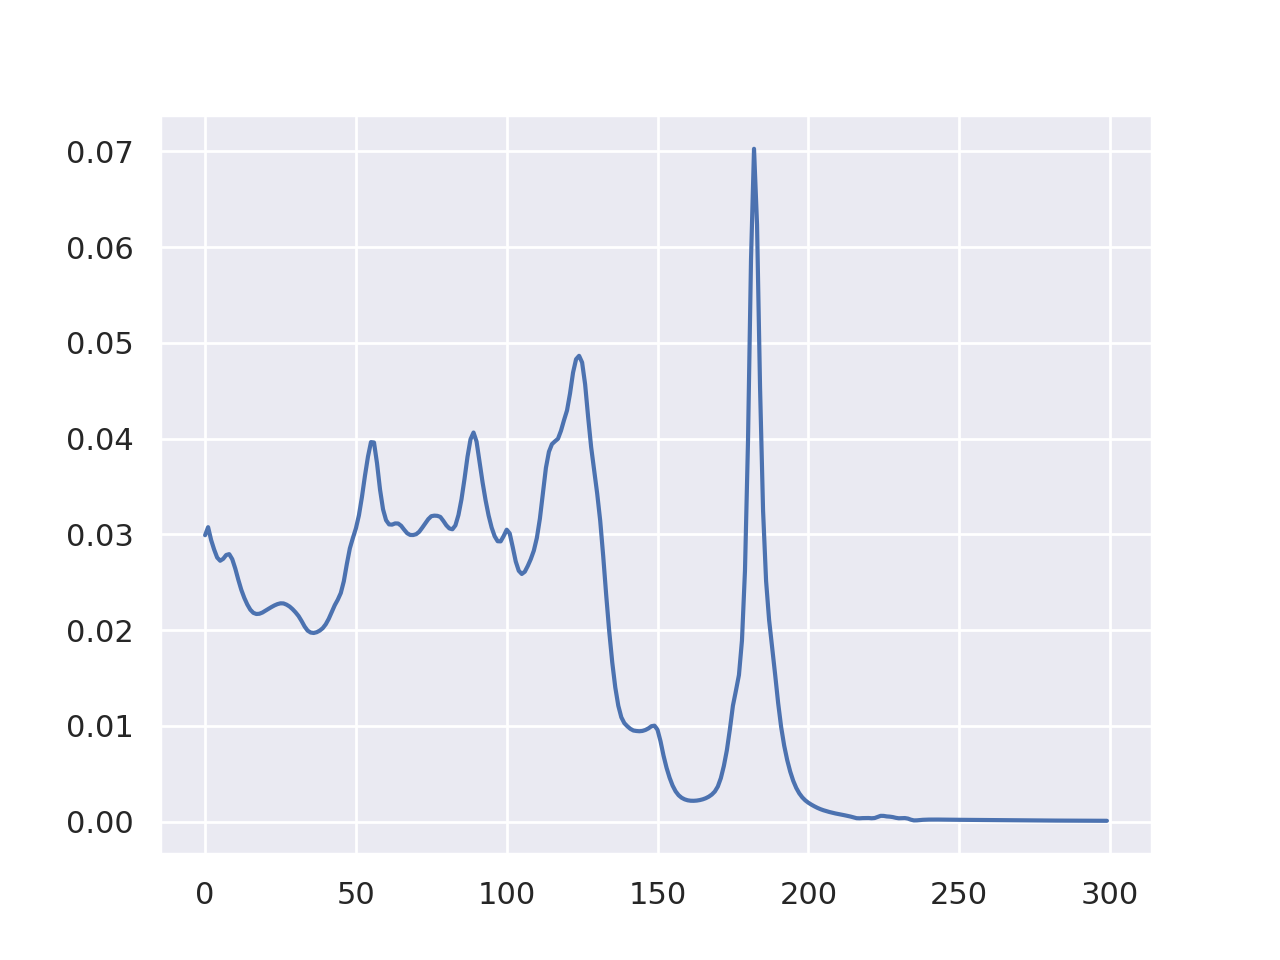

<IPython.core.display.Javascript object>


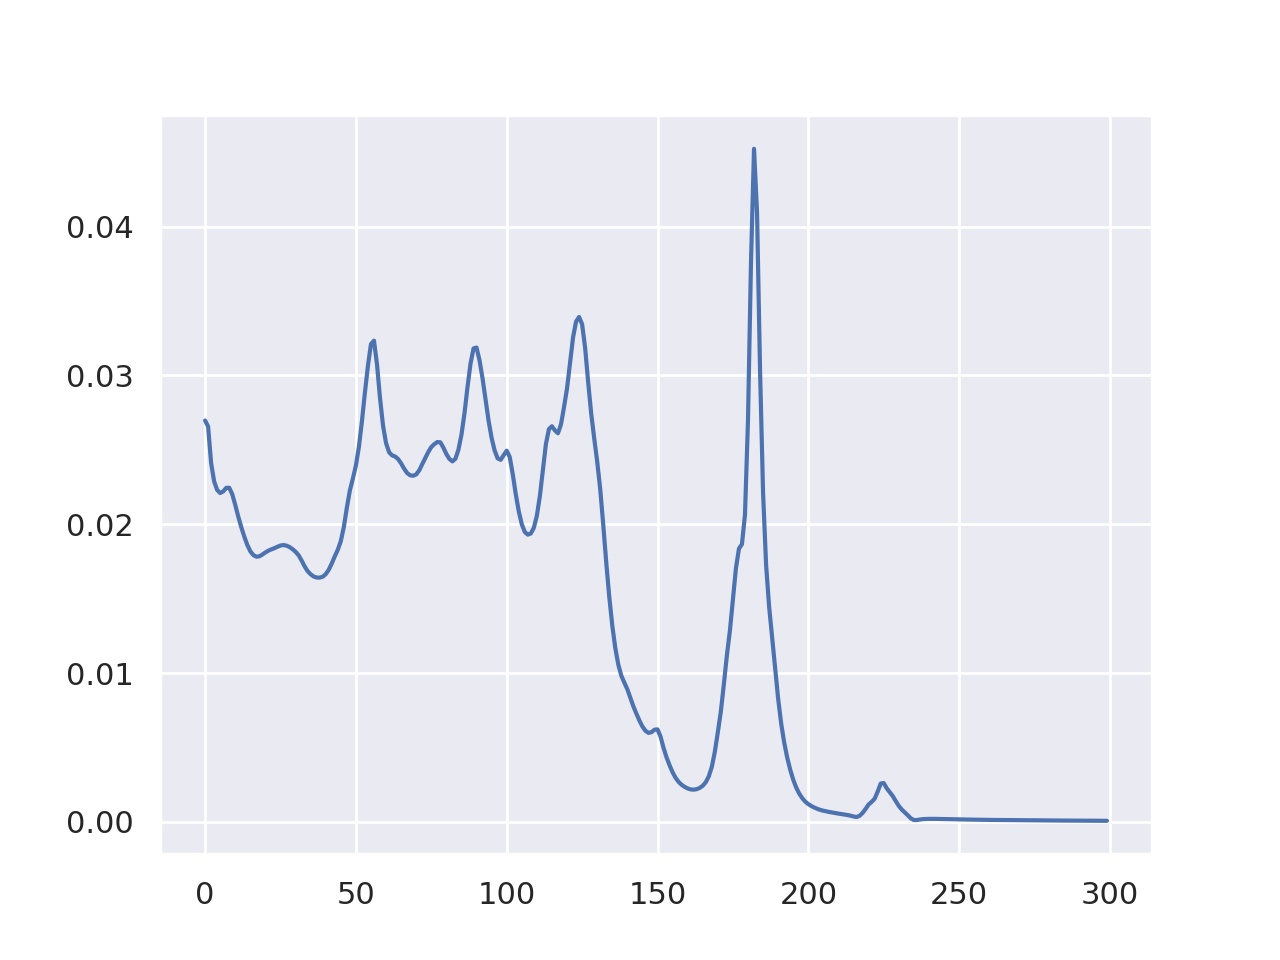

<IPython.core.display.Javascript object>


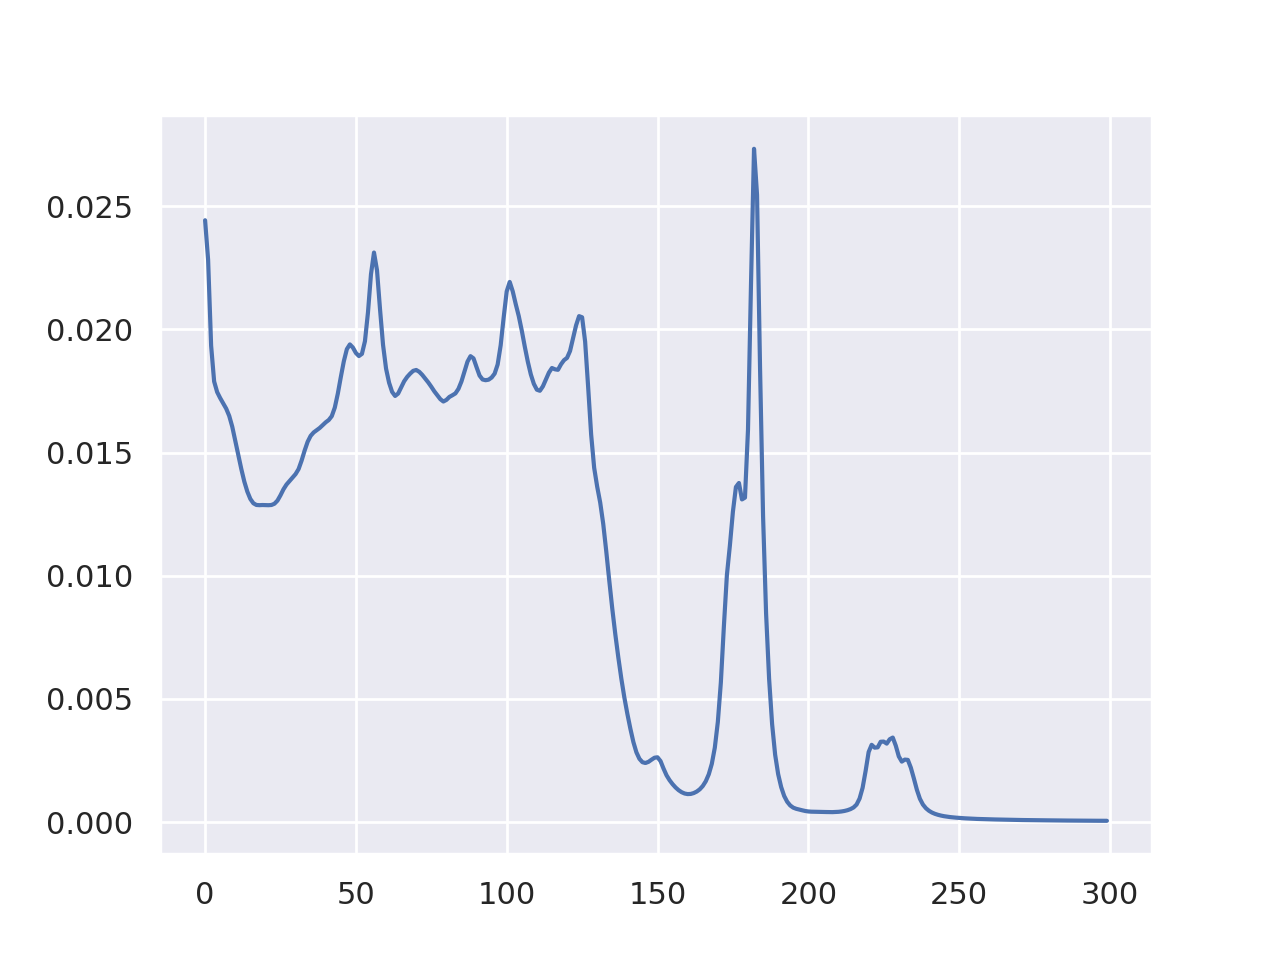

In [11]:
# reverse(w/ normlization)
X_approx = np.dot(Z, U_reduce.T)
x_approx = X_approx * scope + mean
for e in x_approx[:3]:
#for e in x_approx[:3]:
    plt.figure()
    plt.plot(e)
    plt.show()

<IPython.core.display.Javascript object>


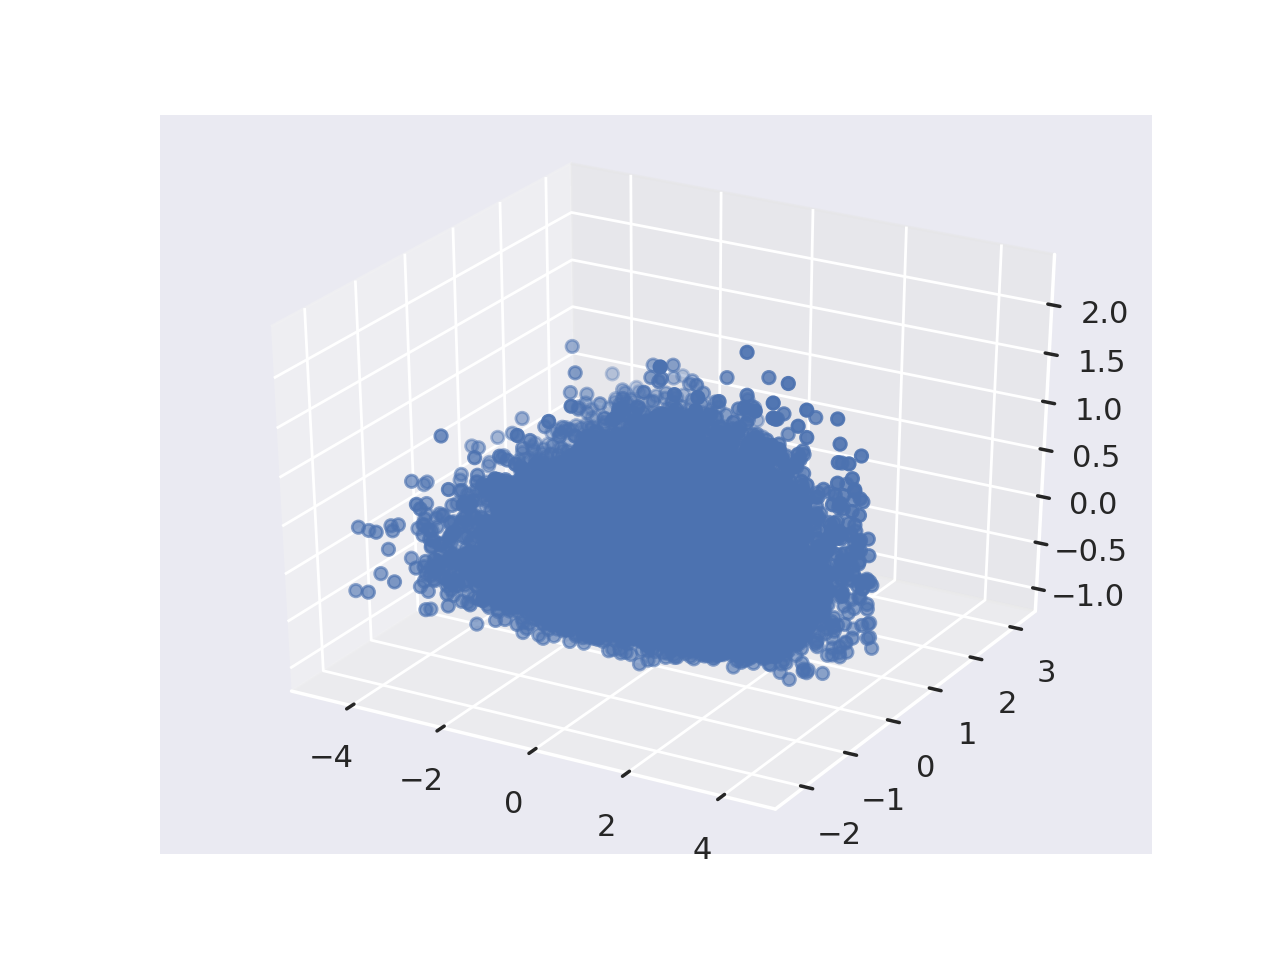

In [12]:
###after PCA(w/nomlization)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=Z[:,0],ys=Z[:,1],zs=Z[:,2])

<IPython.core.display.Javascript object>


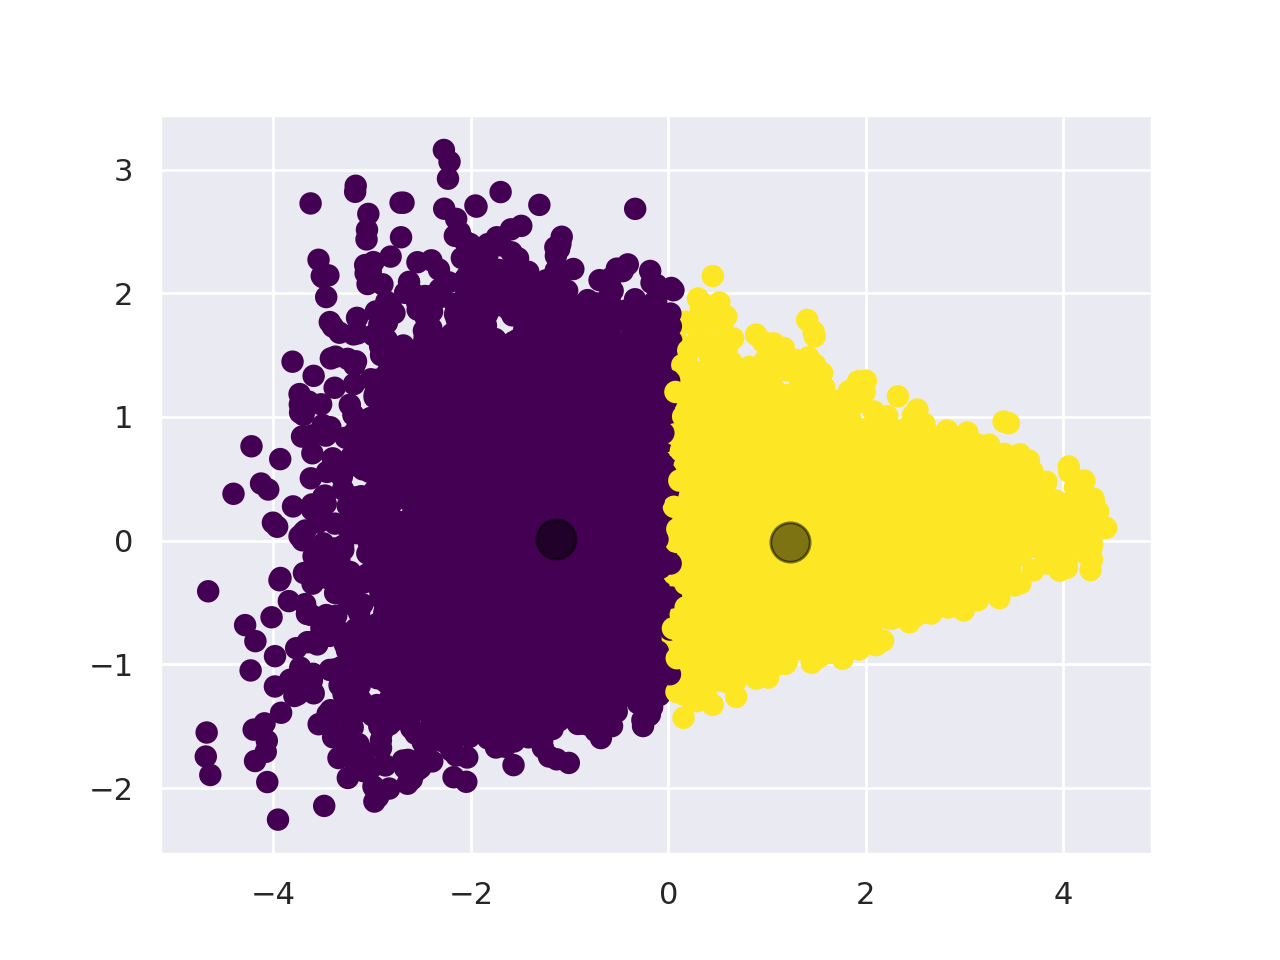

In [13]:
#### data after PCA ----
# principalComponents : sklearn
# Z : w/ norm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(Z)
y_kmeans = kmeans.predict(Z)

#print(y_kmeans.shape, y_kmeans[:10])
plt.figure()
plt.scatter(Z[:, 0], Z[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

<IPython.core.display.Javascript object>


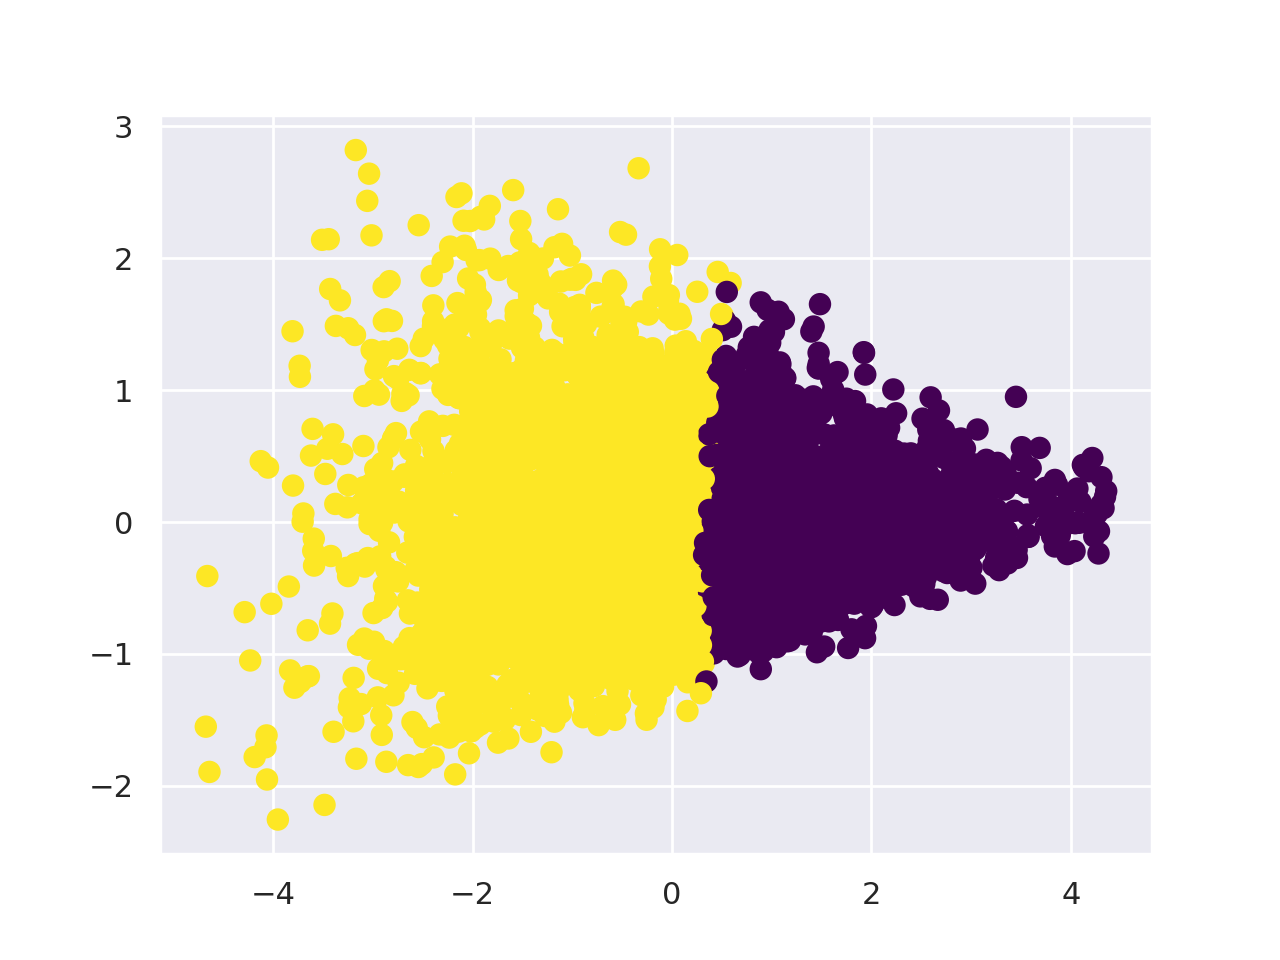

In [14]:
from sklearn.cluster import SpectralClustering
import numpy as np
clustering = SpectralClustering(n_clusters=2).fit(Z[:5000])
plt.figure()
plt.scatter(Z[:5000, 0], Z[:5000, 1], c=clustering.labels_, s=50, cmap='viridis')
plt.show()

In [ ]:
'''
###NOT WORKING
from sklearn.cluster import DBSCAN
clustering = DBSCAN().fit(Z)
set(clustering.labels_)
'''